In [1]:
#importing libary

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report,plot_roc_curve

import warnings
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv",
                 names=['Id_number','refractive_index', 'Sodium' ,'Magnesium', 'Aluminum',
                        'Silicon', 'Potassium', 'Calcium', 'Barium' ,'Iron', 'Type_of_glass'])
df

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [9]:
df.isnull().sum()

Id_number           0
refractive_index    0
Sodium              0
Magnesium           0
Aluminum            0
Silicon             0
Potassium           0
Calcium             0
Barium              0
Iron                0
Type_of_glass       0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id_number         214 non-null    int64  
 1   refractive_index  214 non-null    float64
 2   Sodium            214 non-null    float64
 3   Magnesium         214 non-null    float64
 4   Aluminum          214 non-null    float64
 5   Silicon           214 non-null    float64
 6   Potassium         214 non-null    float64
 7   Calcium           214 non-null    float64
 8   Barium            214 non-null    float64
 9   Iron              214 non-null    float64
 10  Type_of_glass     214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [11]:
df.describe()

,Id_number,refractive_index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


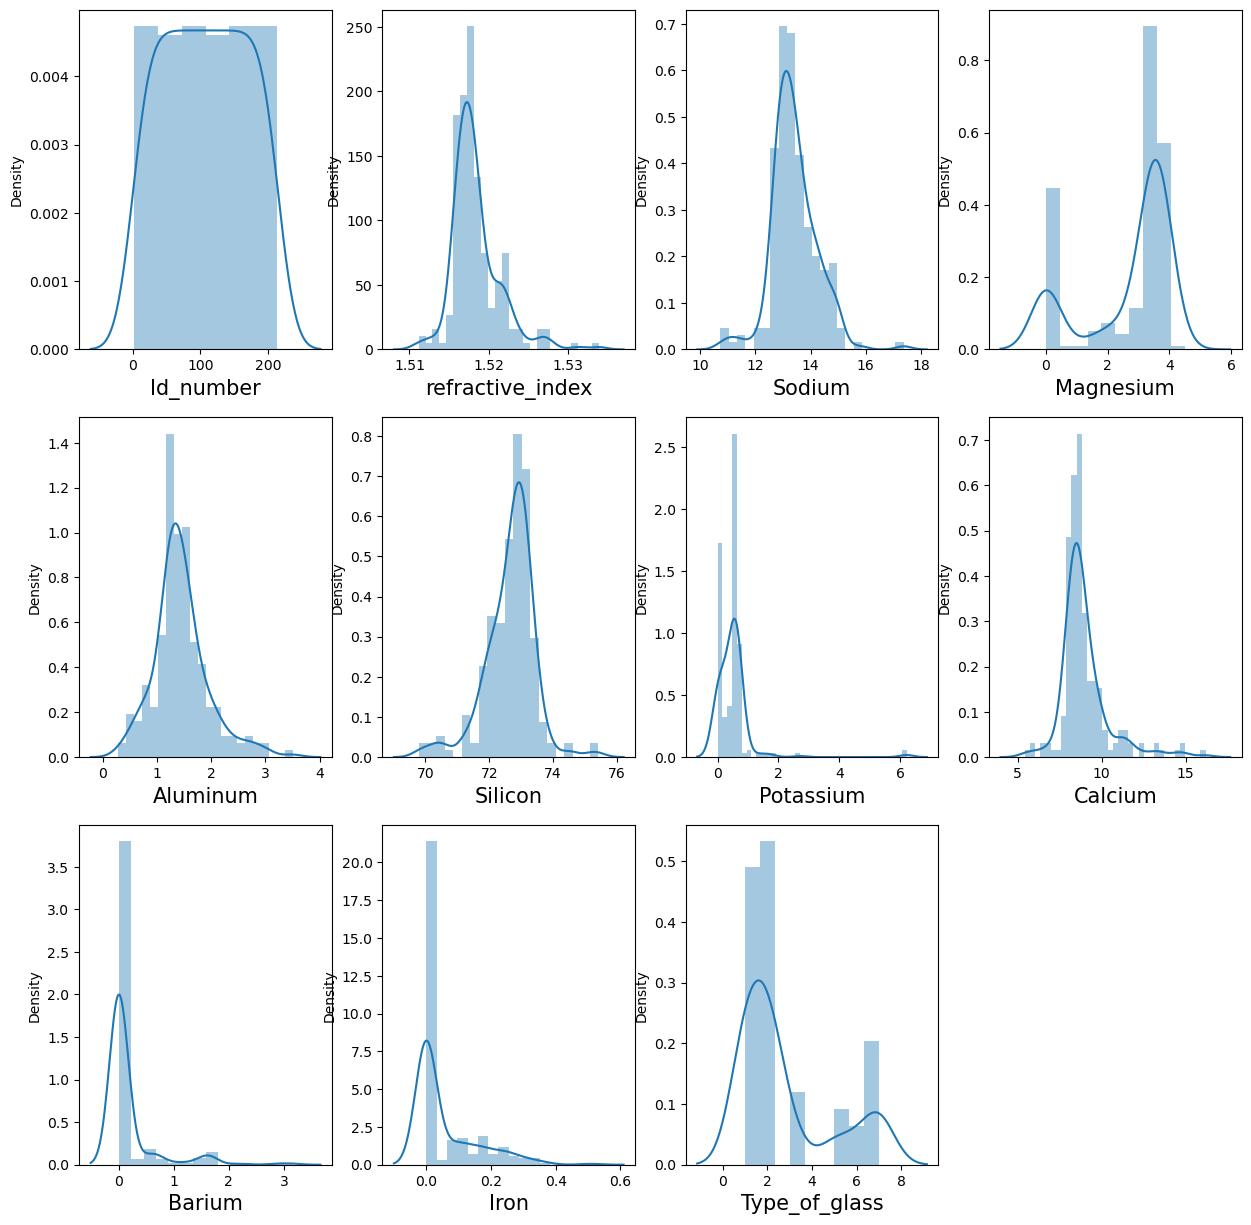

In [12]:
#chechking the data is normal distributed or not

plt.figure(figsize=(15,15))
plotnumber =1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

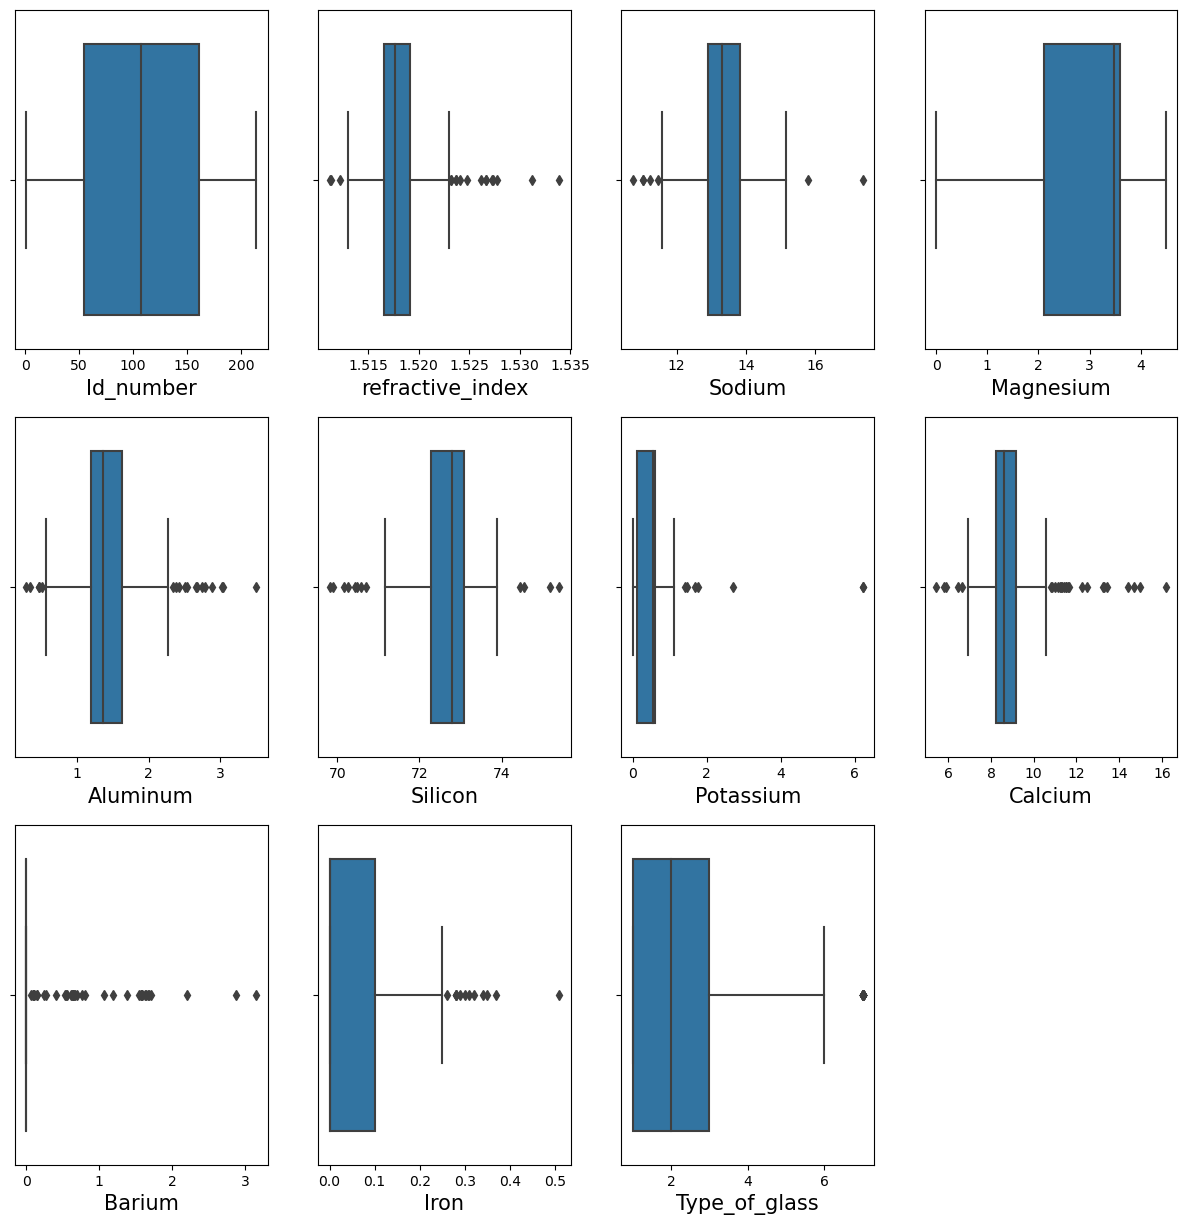

In [14]:

plt.figure(figsize=(15,15))
plotnumber =1

for column in df:
    if plotnumber<=11:
        ax = plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

Here I see almost all features having some outliers but if I deal with these outliers, I lost some data Because outliers had very less difference in the value.

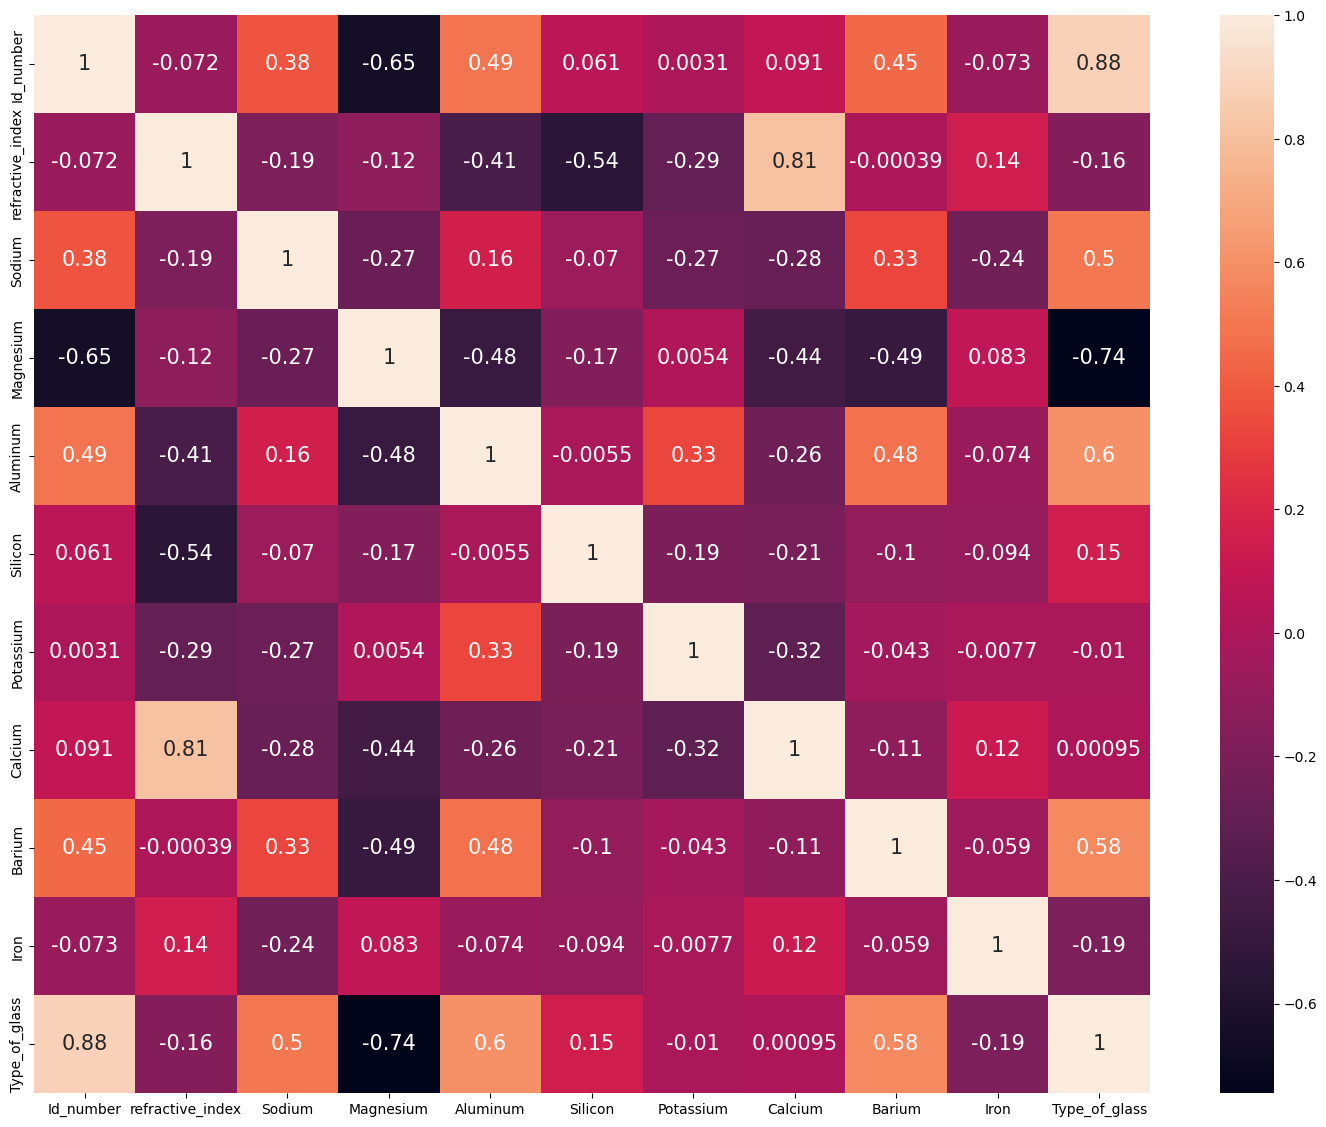

In [16]:
# plotting Heatmap correlation

df_cor= df.corr() # checking relationship

plt.figure(figsize=(18,14))
sns.heatmap(df_cor, annot=True, annot_kws={'size':15})
plt.show()

sodium 0.5, aluminum 0.6 and Barium 0.58 have the highest correlation to type of glass,
magnesium has a high negative correlation at -0.74

In [17]:
X = df.drop(["Id_number","Type_of_glass"], axis=1)
y = df.Type_of_glass

In [18]:
# applying standard scaler

scalar= StandardScaler()
X_scaler= scalar.fit_transform(X)

In [19]:
# train test split

x_train,x_test,y_train,y_test= train_test_split(X_scaler, y, test_size=0.25, random_state=42)

In [20]:
def metric_score(clf,x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred= clf.predict(x_train)
        
        print("\n Train Result:")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train==False:
        pred= clf.predict(x_test)
        
        print("\n Test Result:")
        print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        
        print('\n \n Test classification report \n',classification_report(y_test,pred, digits=2))

In [53]:
#model training
clf = KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier()

In [54]:
# for train result 
metric_score(clf,x_train,x_test,y_train,y_test, train=True)

# for test result
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:76.25%

 Test Result:
Accuracy Score:62.96%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.54      0.93      0.68        14
           2       0.67      0.48      0.56        21
           3       0.00      0.00      0.00         4
           5       0.33      0.25      0.29         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.63        54
   macro avg       0.56      0.55      0.54        54
weighted avg       0.60      0.63      0.59        54



In [40]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(clf,x_test,y_test, cv=12, scoring='accuracy'))

[0.8  0.8  0.4  0.6  0.6  0.8  0.5  0.75 0.5  0.5  0.25 0.5 ]


In [45]:
para = { 'n_neighbors' : range(5,15),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [48]:
grid_search= GridSearchCV(KNeighborsClassifier(), verbose = 1, cv=3, param_grid=para)
grid_search.fit(x_test,y_test)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'euclidean', 'manhattan'],
                         'n_neighbors': range(5, 15),
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [49]:
best_para= grid_search.best_params_
best_para

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}

In [50]:
clf = KNeighborsClassifier(n_neighbors=5,metric='manhattan')

# training model by applying best parameter
clf.fit(x_train,y_train)

metric_score(clf,x_train,x_test,y_train,y_test, train=True)
metric_score(clf,x_train,x_test,y_train,y_test, train=False)


 Train Result:
Accuracy Score:77.50%

 Test Result:
Accuracy Score:70.37%

 
 Test classification report 
               precision    recall  f1-score   support

           1       0.54      1.00      0.70        14
           2       0.86      0.57      0.69        21
           3       0.00      0.00      0.00         4
           5       0.67      0.50      0.57         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        54
   macro avg       0.66      0.62      0.62        54
weighted avg       0.71      0.70      0.67        54



In [51]:
import pickle
pickle.dump(clf, open('glass_data_model.pkl', 'wb'))

In [55]:
pickled_model = pickle.load(open('glass_data_model.pkl', 'rb'))
pickled_model.predict(x_test)

array([1, 7, 1, 7, 2, 2, 1, 2, 2, 1, 6, 2, 1, 2, 6, 5, 7, 1, 1, 7, 2, 7,
       7, 7, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 7, 5, 1, 1, 2, 1, 7, 1, 2,
       1, 5, 1, 1, 2, 1, 1, 1, 1, 2], dtype=int64)